In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline3u877

/home/greatskull/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv('train.csv')
data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [3]:
data.shape

(333, 15)

In [4]:
corr = data.corr()

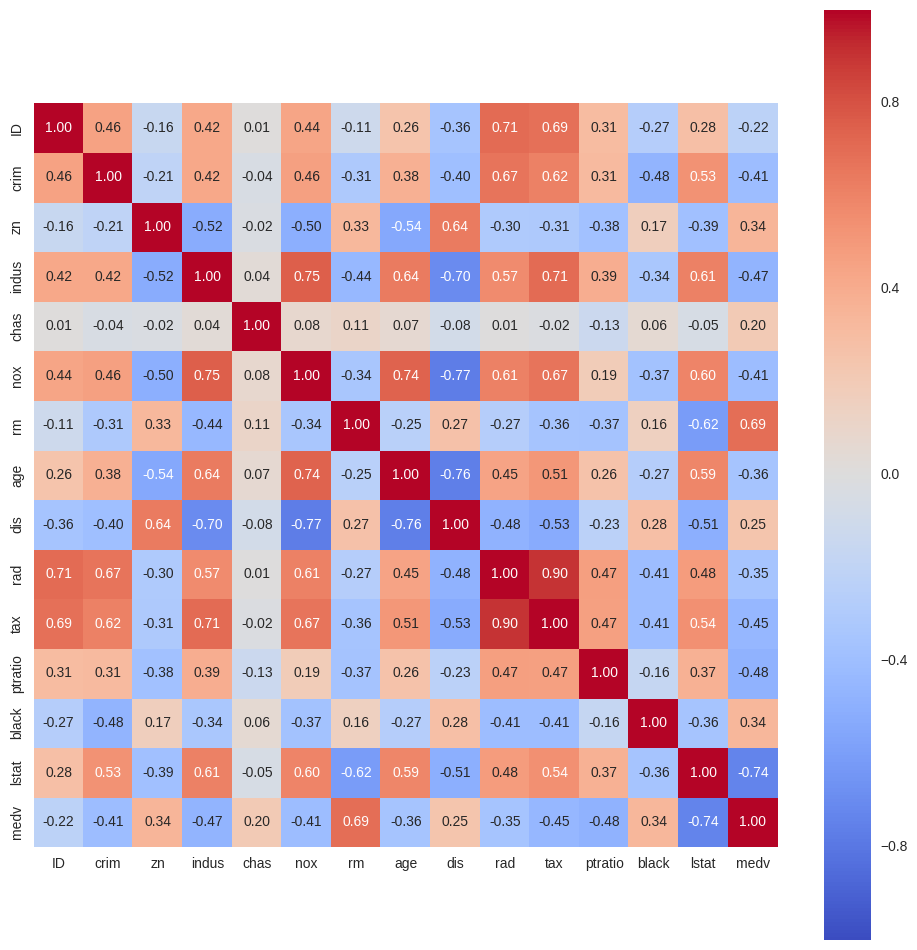

In [5]:
plt.figure(figsize = (12,12))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10}, cmap= 'coolwarm')
plt.show()

In [6]:
X = data.drop(['medv'],axis=1)
y = data["medv"]
features = X.keys()
print X.head()

   ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0   1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1   2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2   4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
3   5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
4   7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   

   ptratio   black  lstat  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     18.7  394.63   2.94  
3     18.7  396.90   5.33  
4     15.2  395.60  12.43  


In [7]:
print X.keys()

Index([u'ID', u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis',
       u'rad', u'tax', u'ptratio', u'black', u'lstat'],
      dtype='object')


In [8]:
print data.describe()

               ID        crim          zn       indus        chas         nox  \
count  333.000000  333.000000  333.000000  333.000000  333.000000  333.000000   
mean   250.951952    3.360341   10.689189   11.293483    0.060060    0.557144   
std    147.859438    7.352272   22.674762    6.998123    0.237956    0.114955   
min      1.000000    0.006320    0.000000    0.740000    0.000000    0.385000   
25%    123.000000    0.078960    0.000000    5.130000    0.000000    0.453000   
50%    244.000000    0.261690    0.000000    9.900000    0.000000    0.538000   
75%    377.000000    3.678220   12.500000   18.100000    0.000000    0.631000   
max    506.000000   73.534100  100.000000   27.740000    1.000000    0.871000   

               rm         age         dis         rad         tax     ptratio  \
count  333.000000  333.000000  333.000000  333.000000  333.000000  333.000000   
mean     6.265619   68.226426    3.709934    9.633634  409.279279   18.448048   
std      0.703952   28.1333

In [9]:
#Remove outliers
# data_wout = data[data.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

#standardisation
# data = (data - data.mean())/data.std()

#Normalisation
# data = (data - data.mean())/(df.max() - df.min())



In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

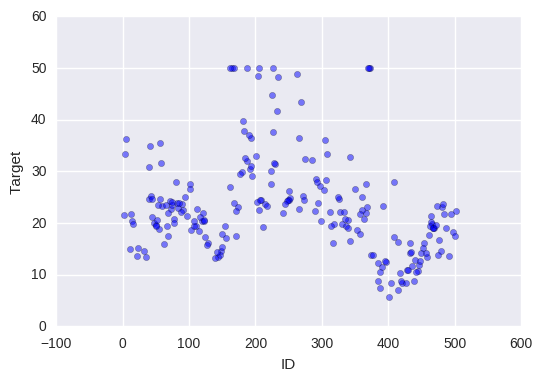

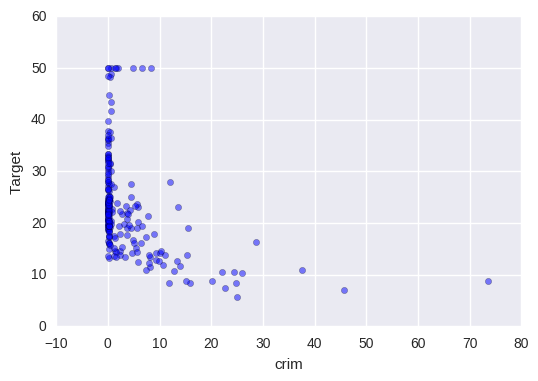

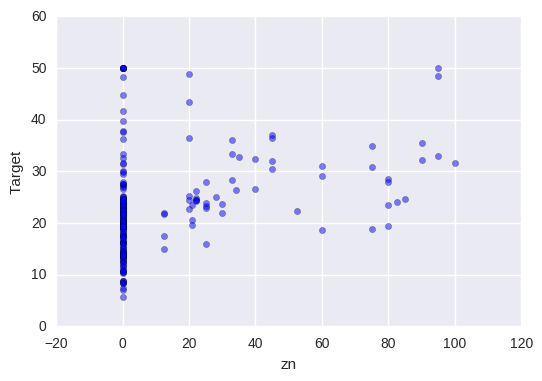

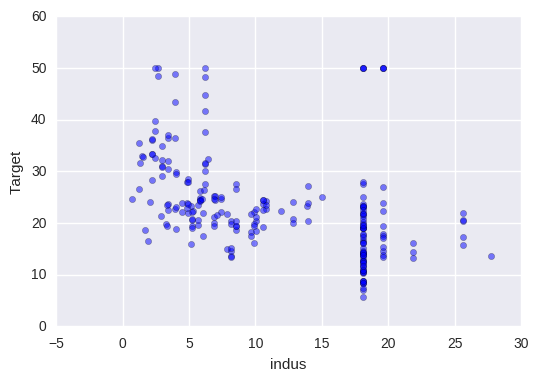

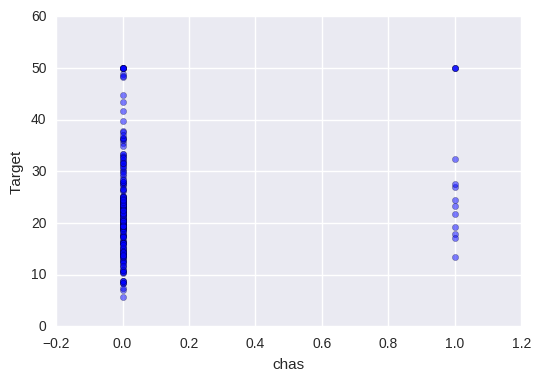

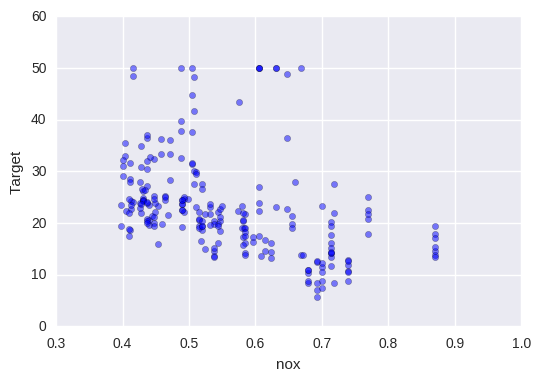

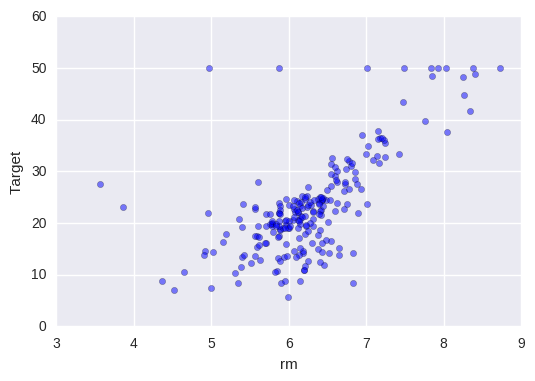

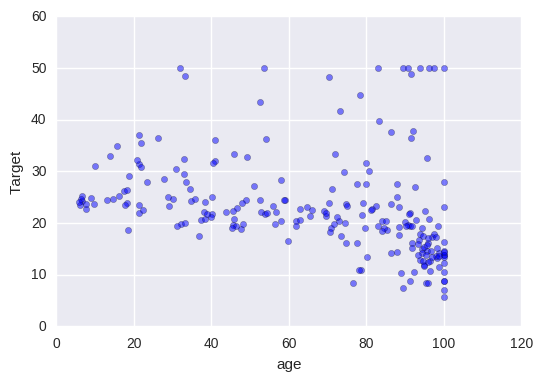

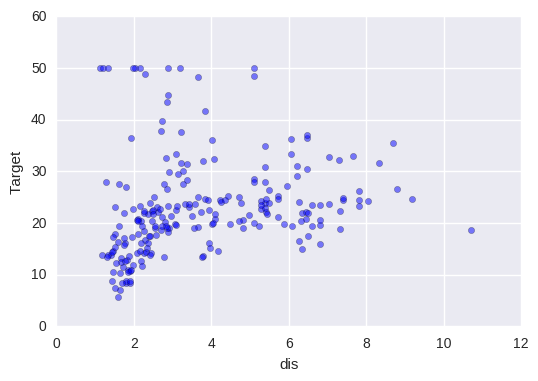

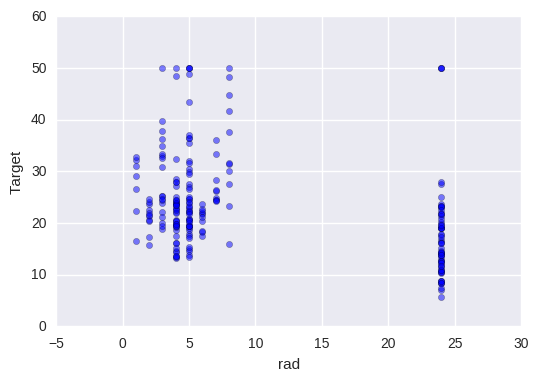

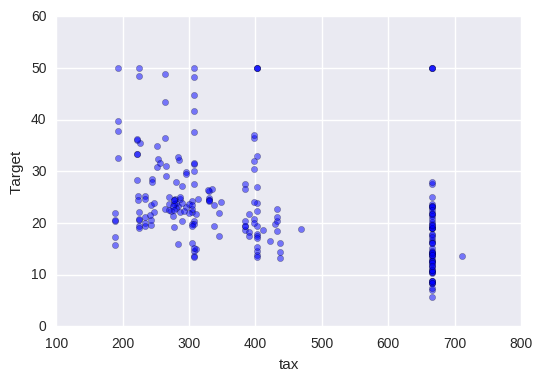

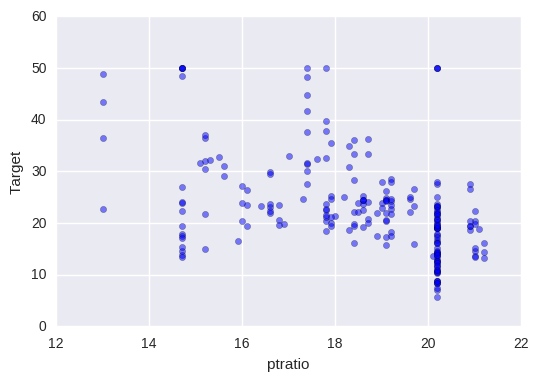

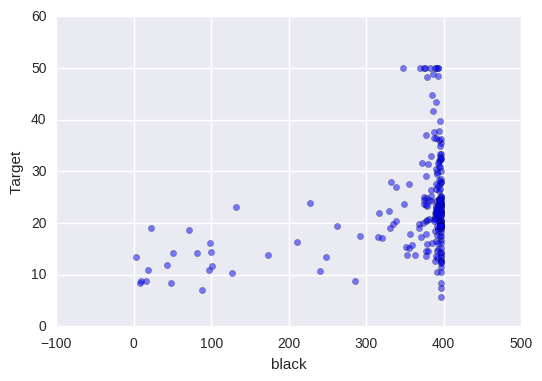

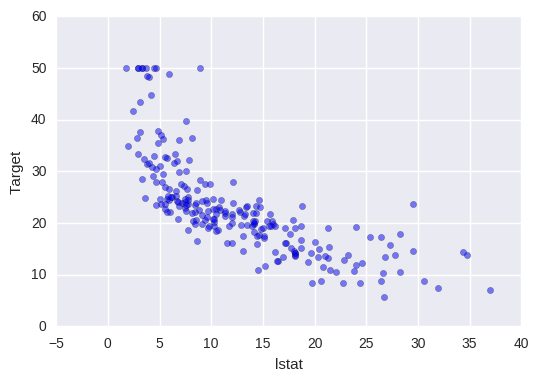

In [11]:
for i in features:
    plt.scatter(X_train[i],y_train,alpha=.5)
    #plt.set_title(str(X_train[i])+'vs Target')
    plt.xlabel(i)
    plt.ylabel('Target')
    plt.show()

In [12]:
model = LinearRegression().fit(X_train,y_train)
print model.score(X_train,y_train)
print model.score(X_test,y_test)

0.747411062726
0.683814160428


In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge

scalar = MinMaxScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [14]:
model_ridge = Ridge(alpha=1).fit(X_train_scaled,y_train)
print model_ridge.score(X_test_scaled,y_test)

0.69381481391


[ 22.08246844   8.86500233  31.62662559  17.33870457  18.31670784
  35.33136541  16.50539079  34.28202921  20.59721215  44.74390816
  24.22551083  23.44425365  28.42728549  14.91233659  23.9073706
  24.8081191   35.65148913  35.90590316  21.73792676  27.4938401
   8.18168364  30.04047781  28.35658912  22.92304293  26.15354376
  10.84633928  19.65903096  21.88974728  19.452087    27.55229005
  23.68478714  19.61679587  21.19966542  14.95721795  12.49965589
  34.00551515  26.63078986  28.20817137  16.56274681  35.85268892
  16.9532356   22.11586602  24.75526109  22.87021986  23.23607166
  19.19810061  16.96482299  22.45182209  13.54120334  22.20880844
  20.2461977   17.06568778  27.85199758  10.76162741  22.12890734
  27.05095704  15.10490074  21.28588265  17.87048224  11.77216808
  16.48163983  25.01802234   0.78450383  34.70039334  21.49678329
  23.44343683  25.74230496  19.74178556  25.62414088  38.48978124
  32.90131852  18.357261    14.70368382  30.24713131  19.1938951
  24.31093742

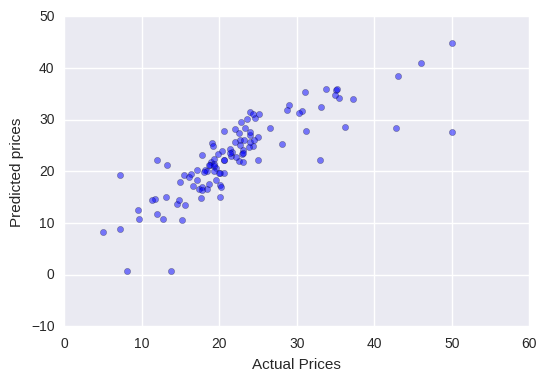

In [15]:
Y_pred = model.predict(X_test)
print Y_pred
plt.scatter(y_test, Y_pred,alpha=.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.show()

In [16]:
mse = sklearn.metrics.mean_squared_error(y_test, Y_pred)
mse

22.267338102820577

In [17]:
from sklearn.model_selection import KFold

kf =  KFold(n_splits = 5)

model = LinearRegression()

print(kf)
for train, test in kf.split(X):
#     print("TRAIN:", train, "TEST:", test)
#     for x in train:
#         try:
#             print X[x]
#         except:
#             print "THe culprit is", x
#     assert False
    
    X_train, X_test = X[train], X[test]
    Y_train, Y_test = y[train], y[test]
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    print ("Score:", sklearn.metrics.r2_score(y_pred, Y_test))
    


KFold(n_splits=5, random_state=None, shuffle=False)


IndexError: indices are out-of-bounds

In [ ]:
X[[67]]